# 2D Unet for Biomedical Image Segmentation

## Python Imports

In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline  

import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms, utils
from skimage import io, transform
from skimage.color import rgb2gray

from models import * 
from train import *
from data_loader import * 

##  Data Loading and Augmentation

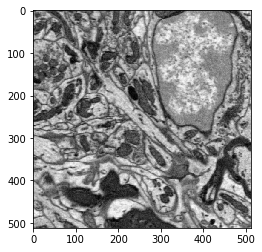

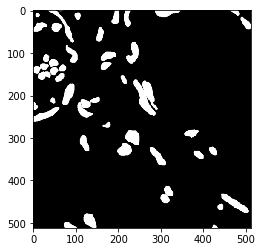

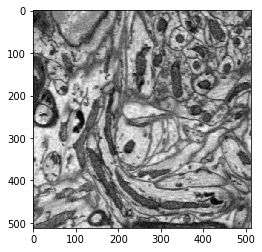

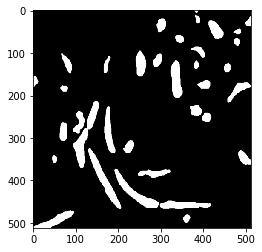

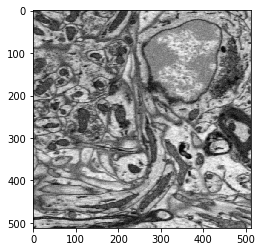

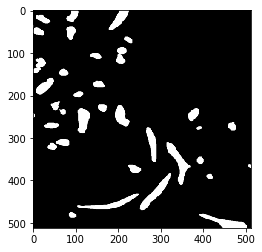

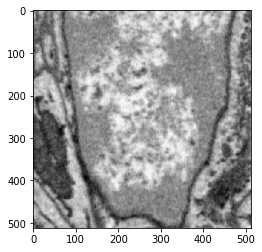

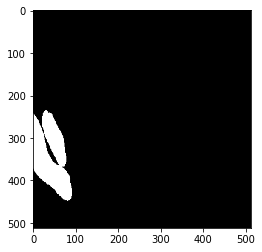

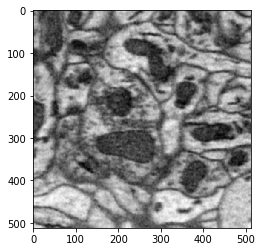

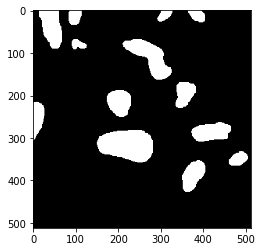

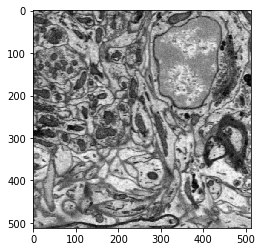

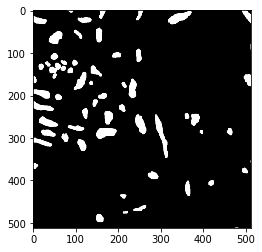

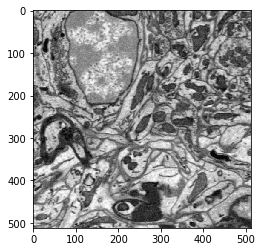

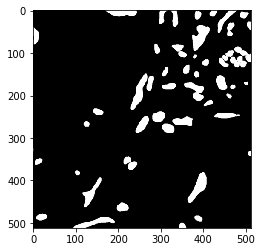

In [2]:
data_dir = './datasets/mitochondria/training/images/'

label_dir = './datasets/mitochondria/training/labels/'

img_resize = 512

MitoDataset = EM_Dataset(data_dir, label_dir, img_resize)


batch_size = 3


MitoDataLoader = DataLoader(MitoDataset,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=4)


val_data_dir = './datasets/mitochondria/validation/images/'

val_label_dir = './datasets/mitochondria/validation/labels/'



MitoValDataset = EM_Dataset(val_data_dir, val_label_dir, img_resize, do_transform=False)

MitoValDataLoader = DataLoader(MitoValDataset,
                             batch_size=1,
                             shuffle=True,
                             num_workers=4)



for i, data in enumerate(MitoDataLoader):


        imgs = data[0]
        labels = data[1]

        plt.imshow(np.squeeze(imgs[0]),cmap="gray")
        plt.show()


        plt.imshow(np.squeeze(labels[0]),cmap="gray")
        plt.show()



GPU is enabled 


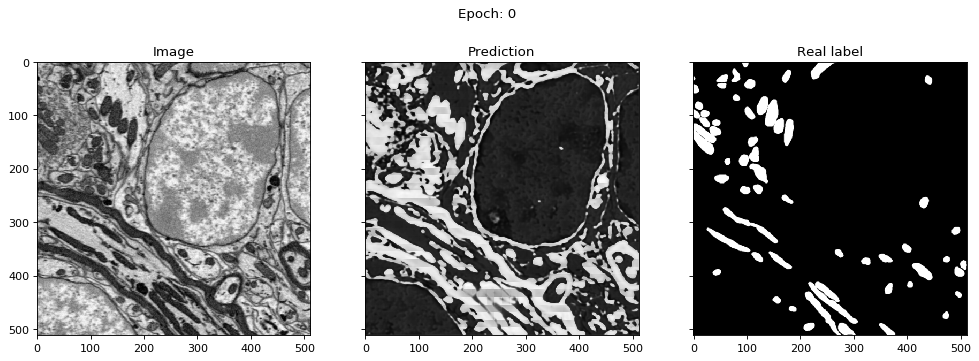

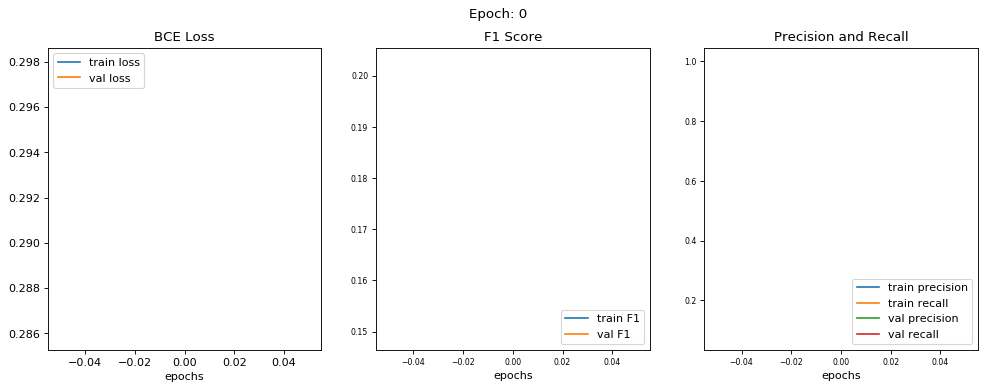

epoch [0/100] 
train loss = 0.2980, train f1 score = 0.2027 
train precision = 0.1138, train recall = 0.9941 

val loss = 0.2859, val f1 score = 0.1491 
val precision = 0.0806, val recall = 1.0000 




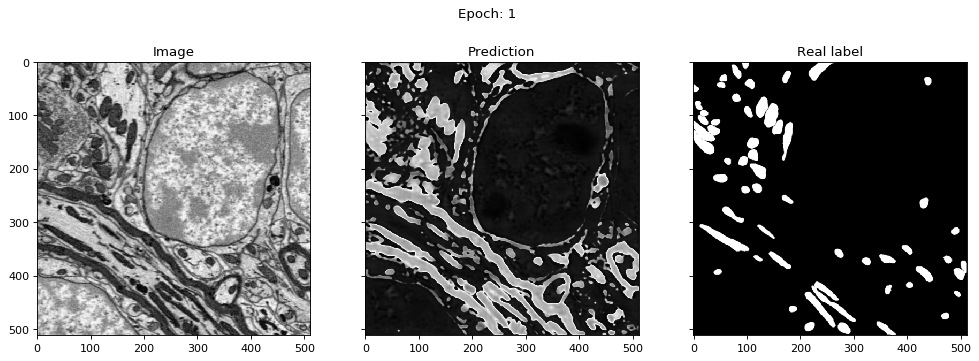

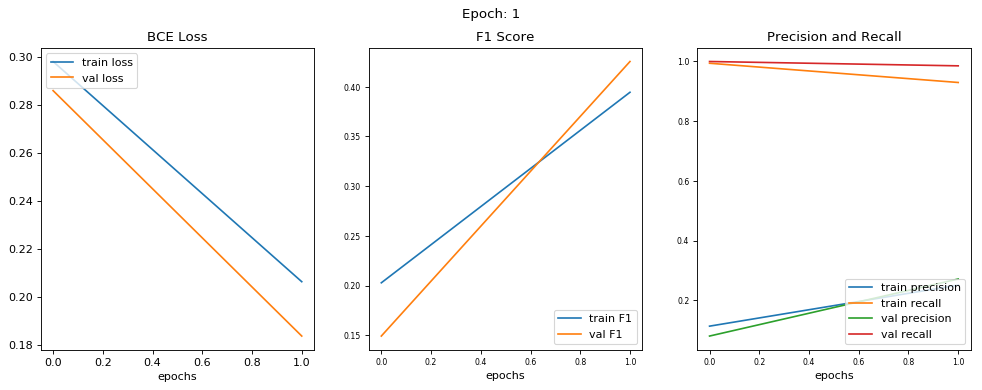

epoch [1/100] 
train loss = 0.2063, train f1 score = 0.3945 
train precision = 0.2513, train recall = 0.9297 

val loss = 0.1837, val f1 score = 0.4255 
val precision = 0.2716, val recall = 0.9855 




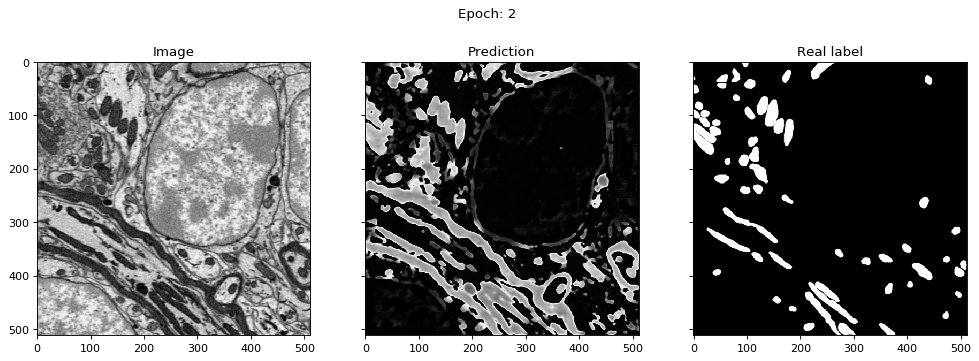

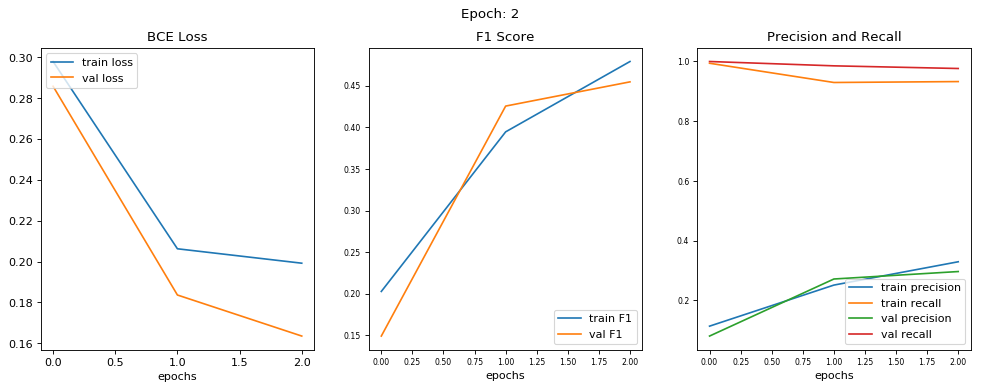

epoch [2/100] 
train loss = 0.1992, train f1 score = 0.4790 
train precision = 0.3294, train recall = 0.9328 

val loss = 0.1636, val f1 score = 0.4546 
val precision = 0.2966, val recall = 0.9766 




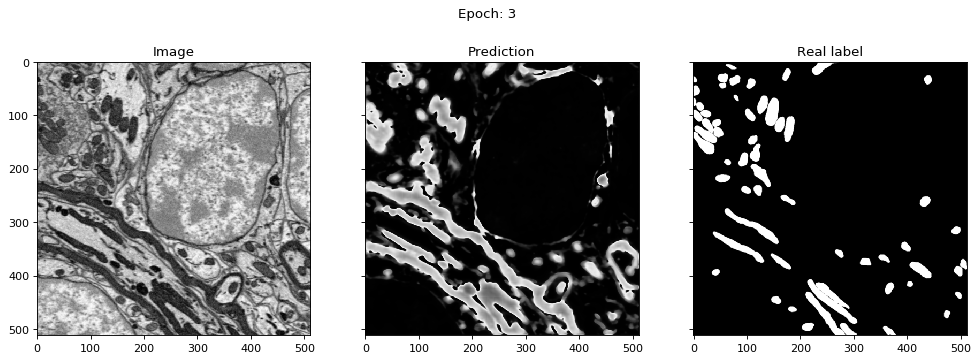

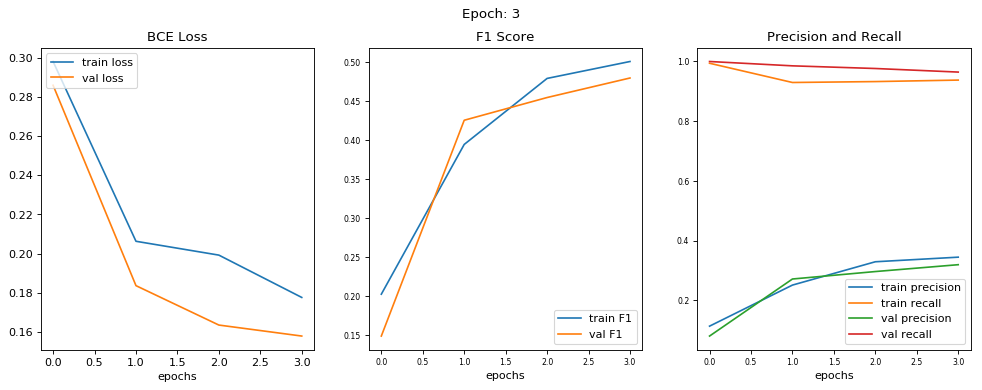

epoch [3/100] 
train loss = 0.1777, train f1 score = 0.5007 
train precision = 0.3448, train recall = 0.9378 

val loss = 0.1580, val f1 score = 0.4796 
val precision = 0.3196, val recall = 0.9646 




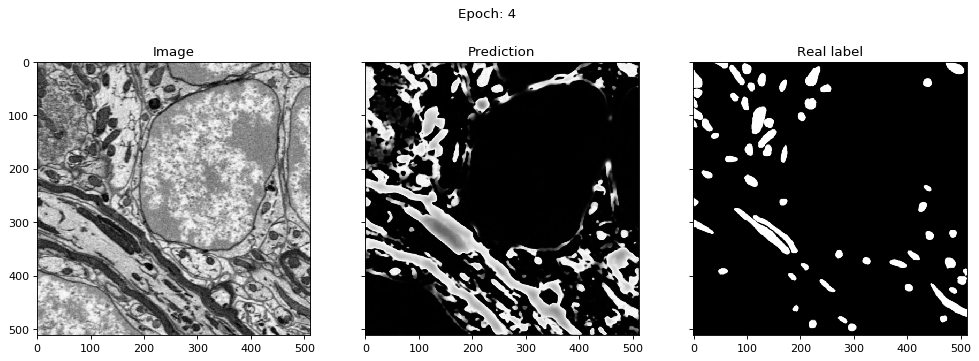

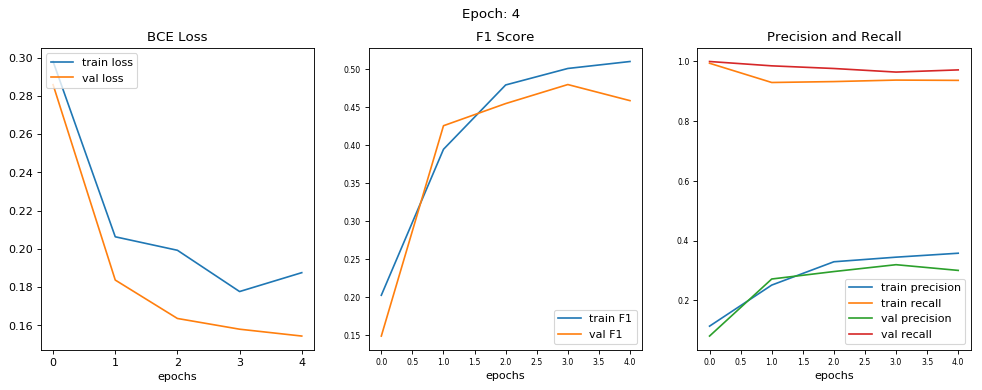

epoch [4/100] 
train loss = 0.1875, train f1 score = 0.5099 
train precision = 0.3580, train recall = 0.9368 

val loss = 0.1544, val f1 score = 0.4584 
val precision = 0.3004, val recall = 0.9719 




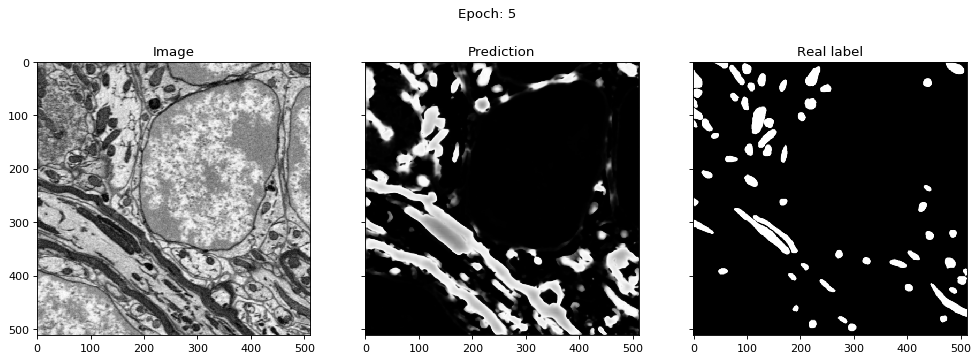

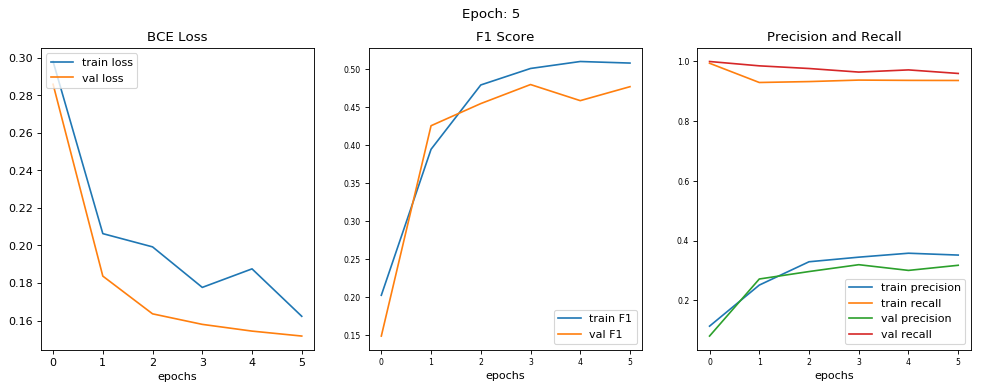

epoch [5/100] 
train loss = 0.1623, train f1 score = 0.5078 
train precision = 0.3518, train recall = 0.9364 

val loss = 0.1517, val f1 score = 0.4768 
val precision = 0.3176, val recall = 0.9600 




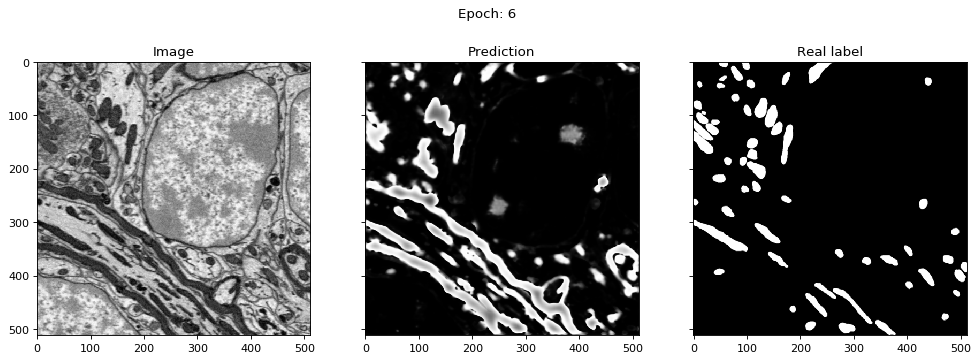

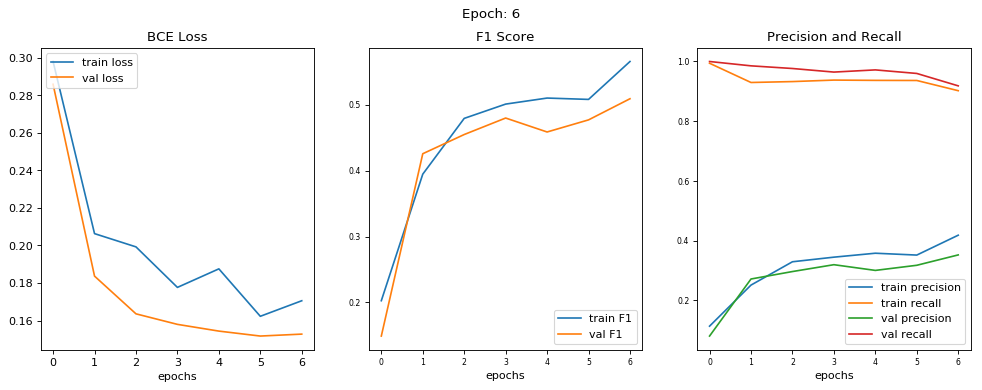

epoch [6/100] 
train loss = 0.1705, train f1 score = 0.5653 
train precision = 0.4183, train recall = 0.9022 

val loss = 0.1528, val f1 score = 0.5088 
val precision = 0.3523, val recall = 0.9184 




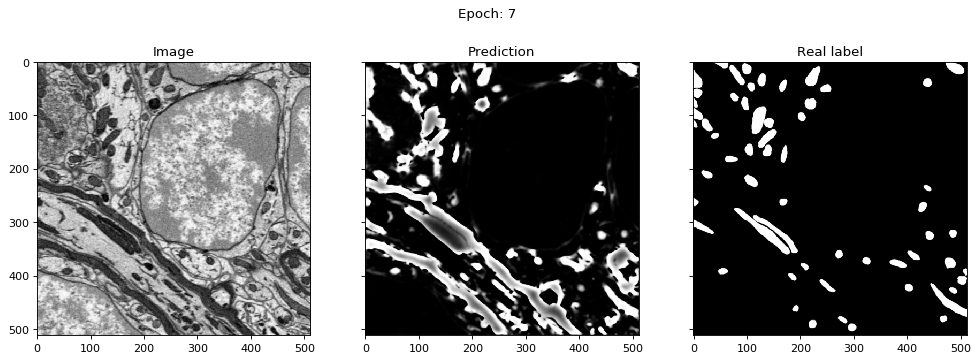

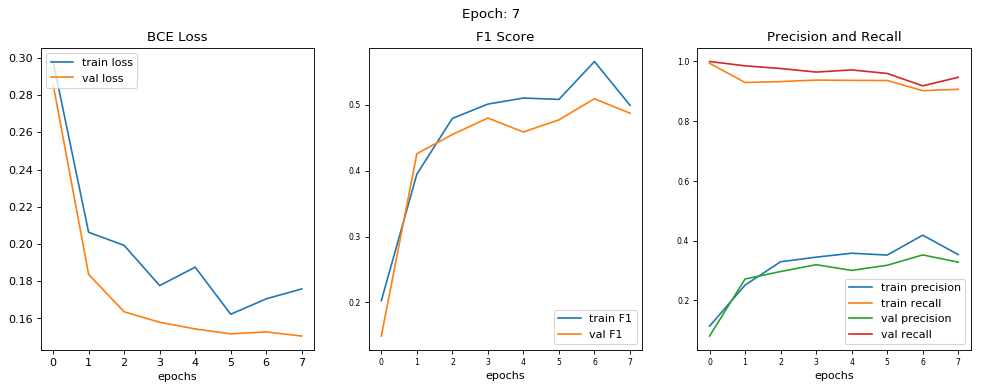

epoch [7/100] 
train loss = 0.1758, train f1 score = 0.4989 
train precision = 0.3535, train recall = 0.9070 

val loss = 0.1505, val f1 score = 0.4869 
val precision = 0.3281, val recall = 0.9471 




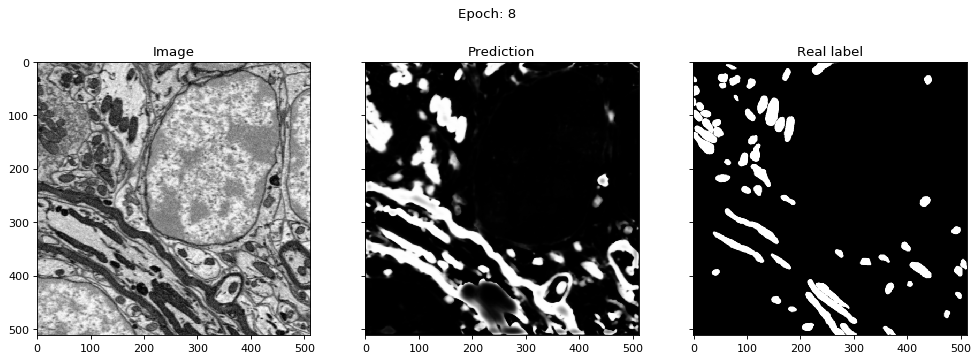

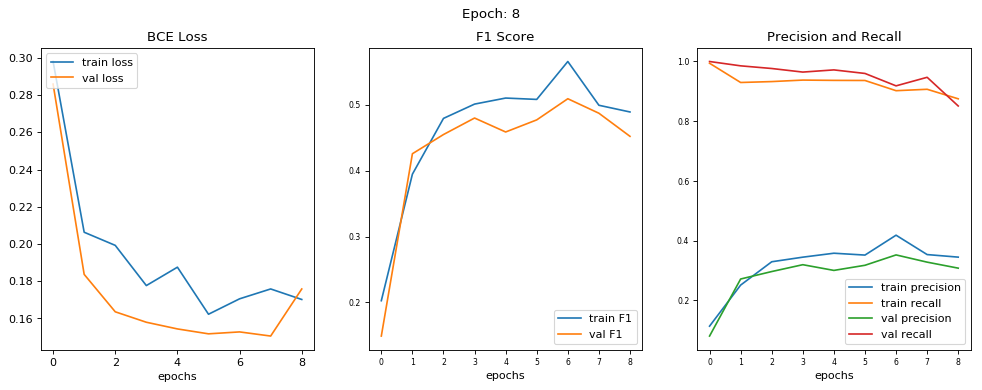

epoch [8/100] 
train loss = 0.1702, train f1 score = 0.4888 
train precision = 0.3449, train recall = 0.8750 

val loss = 0.1758, val f1 score = 0.4518 
val precision = 0.3080, val recall = 0.8511 




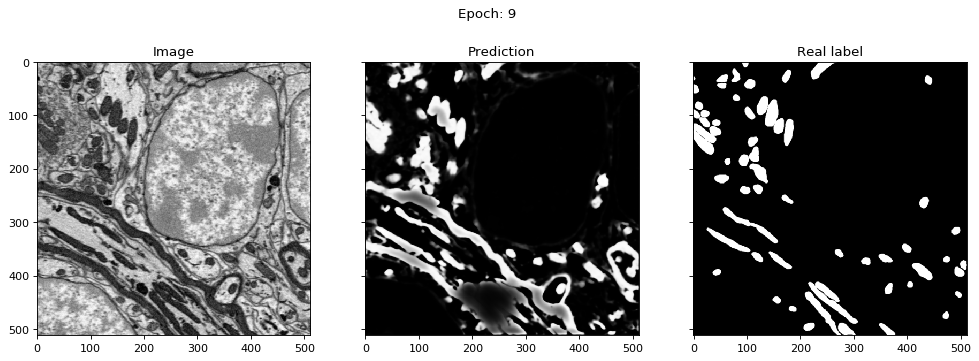

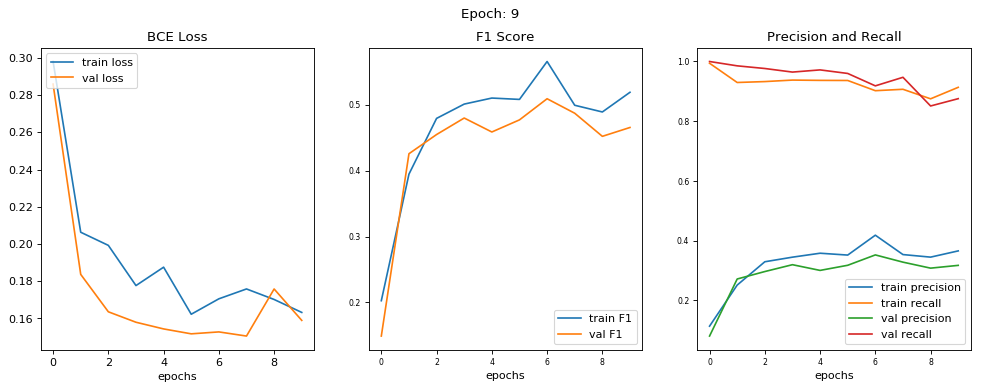

epoch [9/100] 
train loss = 0.1632, train f1 score = 0.5186 
train precision = 0.3658, train recall = 0.9135 

val loss = 0.1590, val f1 score = 0.4653 
val precision = 0.3173, val recall = 0.8755 




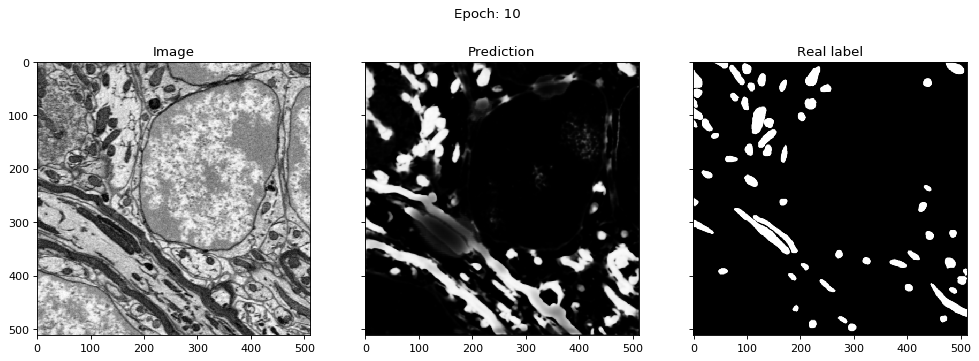

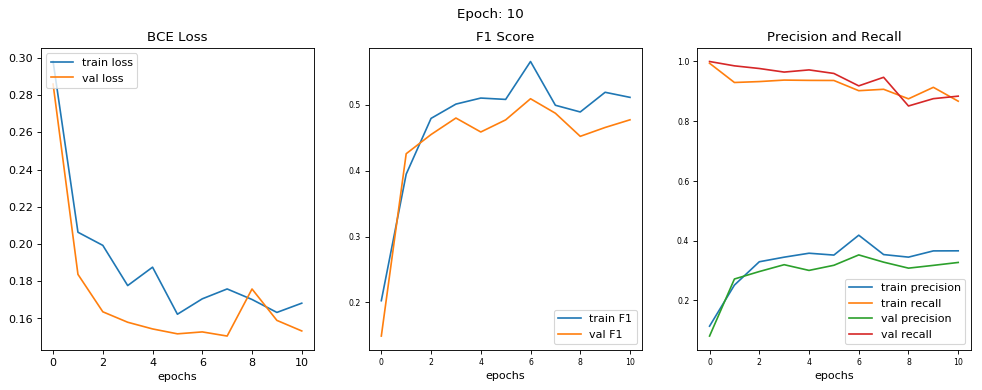

epoch [10/100] 
train loss = 0.1682, train f1 score = 0.5109 
train precision = 0.3660, train recall = 0.8671 

val loss = 0.1533, val f1 score = 0.4769 
val precision = 0.3271, val recall = 0.8840 




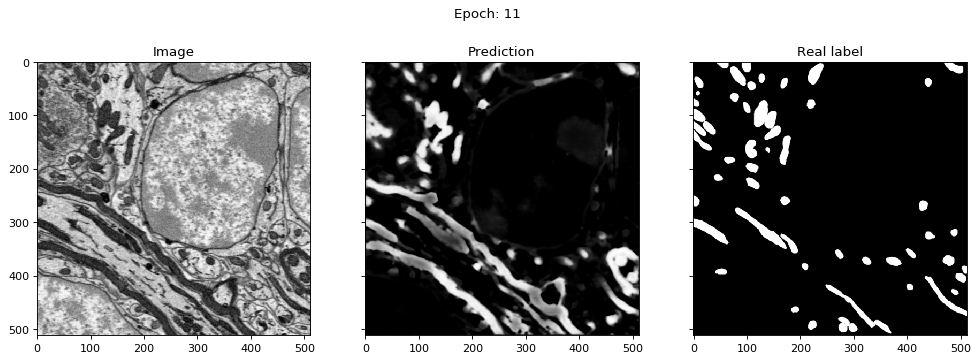

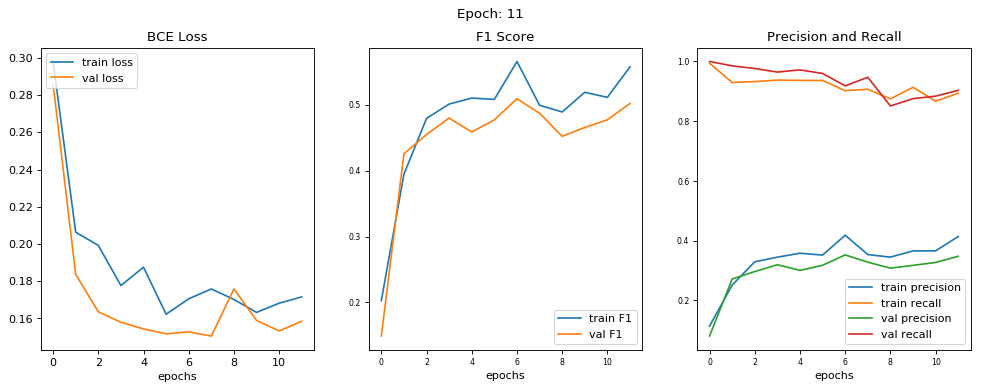

epoch [11/100] 
train loss = 0.1716, train f1 score = 0.5572 
train precision = 0.4138, train recall = 0.8935 

val loss = 0.1585, val f1 score = 0.5017 
val precision = 0.3478, val recall = 0.9035 




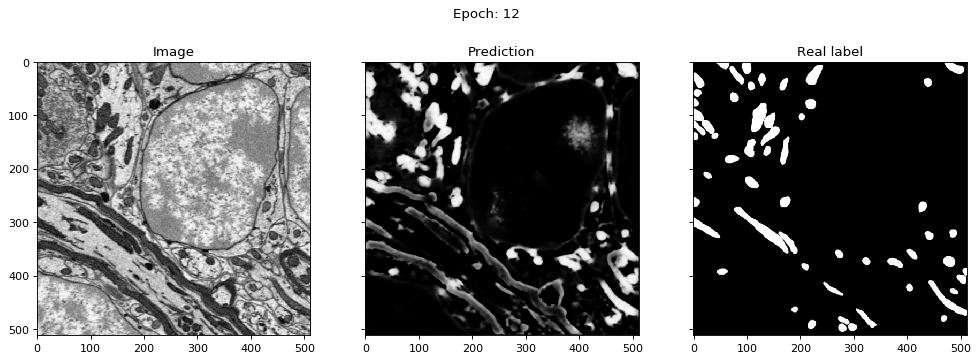

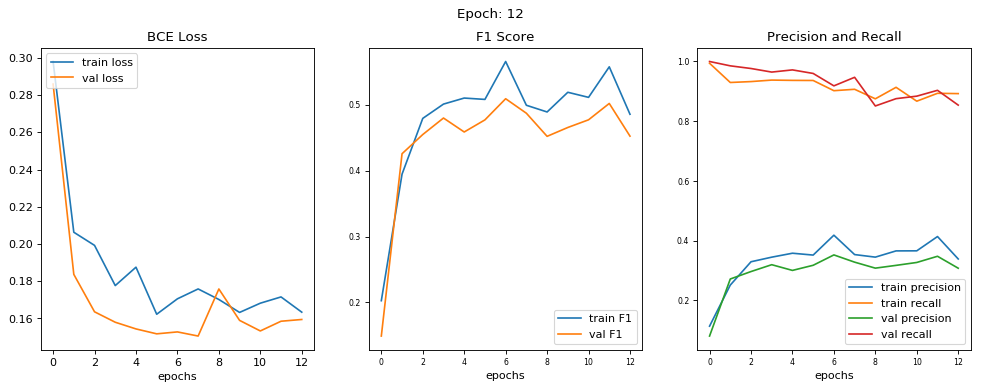

epoch [12/100] 
train loss = 0.1634, train f1 score = 0.4853 
train precision = 0.3387, train recall = 0.8925 

val loss = 0.1594, val f1 score = 0.4521 
val precision = 0.3078, val recall = 0.8540 




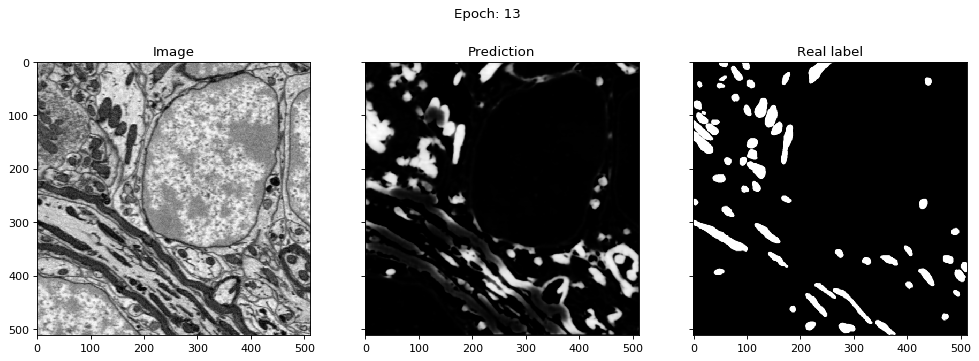

In [ ]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))


n_epochs = 100


#unet(n_channels, n_classes, n_filters_start=64 )
un = unet(1,1)
if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()






# run training 
training(GPU, MitoDataLoader, MitoValDataLoader, MitoValDataset, un, optimizer, criterion, n_epochs, batch_size)